# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ ‚Ññ 9

In [ ]:
%%capture

!pip install --upgrade keras
!pip install torch torchvision torchaudio
!pip install scikit-learn pandas matplotlib transformers -U

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "torch"

import keras
print(keras.__version__)

3.1.1


In [ ]:
# —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
import os, re
import numpy as np
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from collections import Counter
from string import punctuation
import matplotlib.pyplot as plt
%matplotlib inline


import keras, torch
from transformers import AutoModel
from transformers import AutoTokenizer

### –î–æ–æ–±—É—á–µ–Ω–∏–µ Bert


In [ ]:
data = pd.read_csv('lenta_sample.csv')
data.dropna(subset=['topic', 'text'], inplace=True)

In [ ]:
data.topic.value_counts()

topic
–ò–∑ –∂–∏–∑–Ω–∏             55
–ù–∞—É–∫–∞ –∏ —Ç–µ—Ö–Ω–∏–∫–∞      54
–ë—ã–≤—à–∏–π –°–°–°–†          54
–ö—É–ª—å—Ç—É—Ä–∞             53
–¶–µ–Ω–Ω–æ—Å—Ç–∏             45
–î–æ–º                  45
–ë–∏–∑–Ω–µ—Å               44
–ò–Ω—Ç–µ—Ä–Ω–µ—Ç –∏ –°–ú–ò       44
–°–∏–ª–æ–≤—ã–µ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã    40
–°–ø–æ—Ä—Ç                39
–†–æ—Å—Å–∏—è               32
–≠–∫–æ–Ω–æ–º–∏–∫–∞            32
–ú–∏—Ä                  27
69-—è –ø–∞—Ä–∞–ª–ª–µ–ª—å       13
–õ–µ–≥–ø—Ä–æ–º              13
–ë–∏–±–ª–∏–æ—Ç–µ–∫–∞           10
–ö—Ä—ã–º                  7
Name: count, dtype: int64

In [ ]:
def consume_hf_model(name: str):
  tokenizer = AutoTokenizer.from_pretrained(name)
  model_bert = AutoModel.from_pretrained(name)
  return tokenizer, model_bert


model1 = "distilbert-base-multilingual-cased"
model2 = "DeepPavlov/rubert-base-cased"
model3 = "ai-forever/ruBert-base"


tokenizer1, amod1 = consume_hf_model(model1)
tokenizer2, amod2 = consume_hf_model(model2)
tokenizer3, amod3 = consume_hf_model(model3)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


config.json:   0%|          | 0.00/590 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.78M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/716M [00:00<?, ?B/s]

In [ ]:
def yield_data(tokenizer):
  X = []

  for text in data.title:
      ids = tokenizer.encode(text)
      X.append(ids[:512])

  return X

X1 = yield_data(tokenizer1)
X2 = yield_data(tokenizer2)
X3 = yield_data(tokenizer3)

In [ ]:
X1 = keras.preprocessing.sequence.pad_sequences(X1, padding='post', maxlen=512)
X2 = keras.preprocessing.sequence.pad_sequences(X2, padding='post', maxlen=512)
X3 = keras.preprocessing.sequence.pad_sequences(X3, padding='post', maxlen=512)

In [ ]:
print(X1.shape)
print(X2.shape)
print(X3.shape)

(607, 512)
(607, 512)
(607, 512)


In [ ]:
id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = keras.utils.to_categorical([label2id[label] for label in data.topic.values])

In [ ]:
train1_index, valid1_index = train_test_split(list(range(len(X1))), test_size=0.05, stratify=data.topic)
train2_index, valid2_index = train_test_split(list(range(len(X2))), test_size=0.05, stratify=data.topic)
train3_index, valid3_index = train_test_split(list(range(len(X3))), test_size=0.05, stratify=data.topic)

In [ ]:
def split_(train_index, valid_index, X):
  X_train, y_train = X[train_index], y[train_index]
  X_valid, y_valid = X[valid_index], y[valid_index]
  return X_train, y_train, X_valid, y_valid

X_train1, y_train1, X_valid1, y_valid1 = split_(train1_index, valid1_index, X1)
X_train2, y_train2, X_valid2, y_valid2 = split_(train2_index, valid2_index, X2)
X_train3, y_train3, X_valid3, y_valid3 = split_(train3_index, valid3_index, X3)

In [ ]:
def freezer(model):
  change = False
  for param in model.parameters():
    param.requires_grad = change
    change = not change


freezer(amod1)
freezer(amod2)
freezer(amod3)

In [ ]:
class bert_wrapper(keras.Model):
    def __init__(self, model_bert, **kwargs):
        super().__init__(**kwargs)
        # –º–æ–¥–µ–ª—å –Ω—É–∂–Ω–æ –æ–±–µ—Ä–Ω—É—Ç—å –≤ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–π –∫–ª–∞—Å—Å —á—Ç–æ–±—ã –æ–Ω–∞ –±—ã–ª–∞ —Å–æ–≤–º–µ—Å—Ç–∏–º–∞ —Å –¥—Ä—É–≥–∏–º–∏ –∫–µ—Ä–∞—Å —Å–ª–æ—è–º–∏
        self.model_bert = keras.layers.TorchModuleWrapper(model_bert)

    def call(self, inputs):
        x = self.model_bert(inputs)
        return x[0]

In [ ]:
def tune_model(model):
  input_word_ids = keras.layers.Input(shape=(512,), dtype='int32',
                                      name="input_ids")


  output = bert_wrapper(model)(input_word_ids)
  # –¥–æ–±–∞–≤–∏–º –¥—Ä–æ–ø–∞—É—Ç —á—Ç–æ–±—ã –Ω–µ –ø–µ—Ä–µ–æ–±—É—á–∞–ª–æ—Å—å
  drop = keras.layers.Dropout(0.1)(output[:, 0]) # [0][:, 0] - –æ–∑–Ω–∞—á–∞–µ—Ç —á—Ç–æ –º—ã –±–µ—Ä–µ–º –ø–µ—Ä–≤–æ–µ
                                                      # —Å–æ—Å—Ç–æ—è–Ω–∏–µ —É –≤—Å–µ—Ö —Ç–µ–∫—Å—Ç–æ–≤ –≤ –±–∞—Ç—á–µ
  dense = keras.layers.Dense(y.shape[1], activation='softmax')(drop)

  model_clf = keras.Model(inputs=[input_word_ids], outputs=dense)

  # –æ–±—ã—á–Ω–æ –ø—Ä–∏ –¥–æ–æ–±—É—á–µ–Ω–∏–∏ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–æ–≤ –Ω—É–∂–Ω–æ —Å—Ç–∞–≤–∏—Ç—å –æ—á–µ–Ω—å –º–∞–ª–µ–Ω—å–∫–∏–π –ª–æ—Å—Å
  # –Ω–æ –∫–æ–≥–¥–∞ –º—ã –æ–±—É—á–∞–µ–º —Ç–æ–ª—å–∫–æ –∏—Ç–æ–≥–æ–≤—ã–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä —Ç–æ –º–æ–∂–Ω–æ —Å—Ç–∞–≤–∏—Ç—å –ø–æ–±–æ–ª—å—à–µ
  model_clf.compile(keras.optimizers.Adam(learning_rate=1e-3),
                    loss='categorical_crossentropy',
                    metrics=['accuracy',
                            keras.metrics.RecallAtPrecision(0.80, name='rec_prec')])
  return model_clf

model_clf1 = tune_model(amod1)
model_clf2 = tune_model(amod2)
model_clf3 = tune_model(amod3)

In [ ]:
def to_cuda(model_clf):
  if torch.cuda.is_available():
      model_clf.to('cuda')

to_cuda(model_clf1)
to_cuda(model_clf2)
to_cuda(model_clf3)

In [ ]:
# –æ—à–∏–±–∫–∞ —Å device meta, –∞ –∫–∞–∫ –µ–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ –∏—Å–ø—Ä–∞–≤–∏—Ç—å?
model_clf1.fit(torch.LongTensor(X_train1), torch.LongTensor(y_train1),
          validation_data=(torch.LongTensor(X_valid1), torch.LongTensor(y_valid1)),
          batch_size=20,
          epochs=5) # —Ç—É—Ç –≤ –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏—è –ø–∏—à—É—Ç: recommend passing in an `attention_mask`, –∫–∞–∫ —ç—Ç–æ —Å–¥–µ–ª–∞—Ç—å?
          # –∏ –µ—â–µ —Ç–∞–∫–æ–π –≤–æ–ø—Ä–æ—Å: –µ—Å–ª–∏ —è —Å–∫–∞—á–∏–≤–∞—é –º–æ–¥–µ–ª—å, —Ç–æ –º–æ–∂–Ω–æ –∫–∞–∫-—Ç–æ —É–±—Ä–∞—Ç—å –∫–∞–∫–∏–µ-—Ç–æ –µ–µ —Å–ª–æ–∏ —Å –ø–æ–º–æ—â—å—é –∫–µ—Ä–∞—Å –∞–ø–∏?

Epoch 1/5
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 785ms/step - accuracy: 0.2237 - loss: 2.5212 - rec_prec: 0.0113 - val_accuracy: 0.2258 - val_loss: 2.5625 - val_rec_prec: 0.0323
Epoch 2/5
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22s 751ms/step - accuracy: 0.2253 - loss: 2.4482 - rec_prec: 0.0116 - val_accuracy: 0.0968 - val_loss: 2.5988 - val_rec_prec: 0.0000e+00
Epoch 3/5
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 728ms/step - accuracy: 0.1854 - loss: 2.4835 - rec_prec: 0.0158 - val_accuracy: 0.2581 - val_loss: 2.5426 - val_rec_prec: 0.0000e+00
Epoch 4/5
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 740ms/step - accuracy: 0.2049 - loss: 2.4657 - rec_prec: 0.0068 - val_accuracy: 0.1935 - val_loss: 2.5659 - val_rec_prec: 0.0323
Epoch 5/5
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22s 750ms/step - accuracy: 0.2166 - loss: 2.4791 - rec_prec: 0.0354 - val_a

In [ ]:
model_clf2.fit(torch.LongTensor(X_train2), torch.LongTensor(y_train2),
          validation_data=(torch.LongTensor(X_valid2), torch.LongTensor(y_valid2)),
          batch_size=20,
          epochs=5)

Epoch 1/5
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 56s 2s/step - accuracy: 0.1556 - loss: 2.6112 - rec_prec: 0.0029 - val_accuracy: 0.1613 - val_loss: 2.6651 - val_rec_prec: 0.0000e+00
Epoch 2/5
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 54s 2s/step - accuracy: 0.1599 - loss: 2.6255 - rec_prec: 0.0066 - val_accuracy: 0.1613 - val_loss: 2.6503 - val_rec_prec: 0.0000e+00
Epoch 3/5
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55s 2s/step - accuracy: 0.1619 - loss: 2.6032 - rec_prec: 0.0058 - val_accuracy: 0.1613 - val_loss: 2.6280 - val_rec_prec: 0.0000e+00
Epoch 4/5
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55s 2s/step - accuracy: 0.1394 - loss: 2.6109 - rec_prec: 0.0078 - val_accuracy: 0.1290 - val_loss: 2.6625 - val_rec_prec: 0.0000e+00
Epoch 5/5
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55s 2s/step - accuracy: 0.1568 - loss: 2.6003 - rec_prec: 0.0139 - val_accuracy

In [ ]:
model_clf3.fit(torch.LongTensor(X_train3), torch.LongTensor(y_train3),
          validation_data=(torch.LongTensor(X_valid3), torch.LongTensor(y_valid3)),
          batch_size=20,
          epochs=5)

Epoch 1/5
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 56s 2s/step - accuracy: 0.1643 - loss: 2.6071 - rec_prec: 8.4921e-04 - val_accuracy: 0.2258 - val_loss: 2.6021 - val_rec_prec: 0.0323
Epoch 2/5
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 54s 2s/step - accuracy: 0.1982 - loss: 2.5628 - rec_prec: 0.0027 - val_accuracy: 0.2258 - val_loss: 2.6323 - val_rec_prec: 0.0323
Epoch 3/5
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55s 2s/step - accuracy: 0.1514 - loss: 2.5181 - rec_prec: 4.1667e-04 - val_accuracy: 0.2581 - val_loss: 2.6464 - val_rec_prec: 0.0645
Epoch 4/5
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55s 2s/step - accuracy: 0.1764 - loss: 2.5285 - rec_prec: 0.0094 - val_accuracy: 0.2258 - val_loss: 2.5668 - val_rec_prec: 0.0000e+00
Epoch 5/5
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55s 2s/step - accuracy: 0.2360 - loss: 2.4115 - rec_prec: 0.0016 - val_accuracy: 0.

In [ ]:
def sum_for_model(model_clf):
  print(model_clf.history.history.keys())
  plt.plot(model_clf.history.history['accuracy'])
  plt.plot(model_clf.history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

dict_keys(['accuracy', 'loss', 'rec_prec', 'val_accuracy', 'val_loss', 'val_rec_prec'])


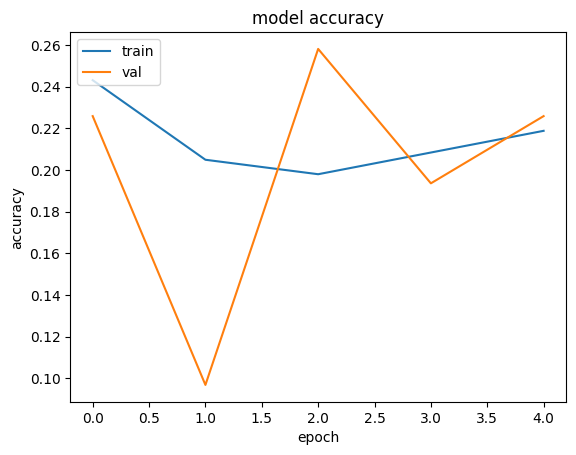

In [ ]:
sum_for_model(model_clf1)

dict_keys(['accuracy', 'loss', 'rec_prec', 'val_accuracy', 'val_loss', 'val_rec_prec'])


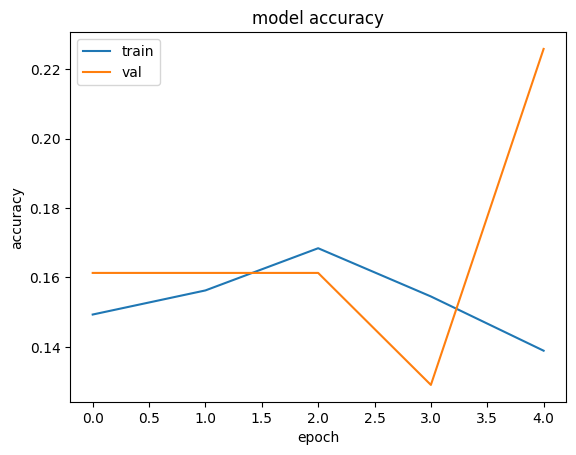

In [ ]:
sum_for_model(model_clf2)

dict_keys(['accuracy', 'loss', 'rec_prec', 'val_accuracy', 'val_loss', 'val_rec_prec'])


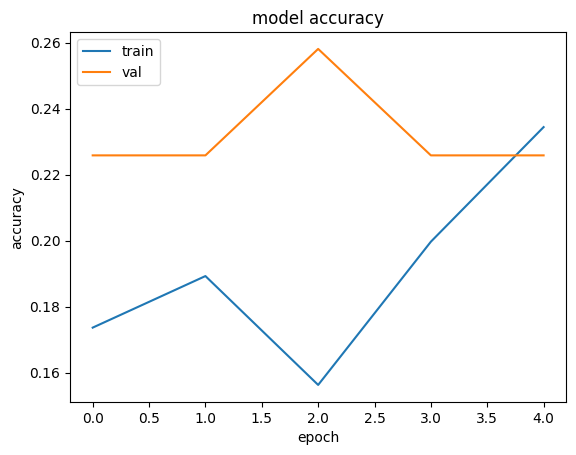

In [ ]:
sum_for_model(model_clf3)

In [ ]:
def report(model_clf, X_valid, y_valid):
  pred = model_clf.predict(X_valid, batch_size=10).argmax(1)
  print(classification_report(y_valid.argmax(1), pred, labels=list(range(len(label2id))),
                            target_names=list(label2id), zero_division=0))

In [ ]:
report(model_clf1, X_valid1, y_valid1)

4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 165ms/step
                   precision    recall  f1-score   support

   69-—è –ø–∞—Ä–∞–ª–ª–µ–ª—å       0.00      0.00      0.00         1
      –ë—ã–≤—à–∏–π –°–°–°–†       1.00      0.33      0.50         3
         –¶–µ–Ω–Ω–æ—Å—Ç–∏       0.00      0.00      0.00         2
           –ë–∏–∑–Ω–µ—Å       0.00      0.00      0.00         2
       –ë–∏–±–ª–∏–æ—Ç–µ–∫–∞       0.00      0.00      0.00         0
        –≠–∫–æ–Ω–æ–º–∏–∫–∞       0.00      0.00      0.00         2
         –ò–∑ –∂–∏–∑–Ω–∏       0.33      0.67      0.44         3
              –î–æ–º       0.00      0.00      0.00         2
            –°–ø–æ—Ä—Ç       0.00      0.00      0.00         2
   –ò–Ω—Ç–µ—Ä–Ω–µ—Ç –∏ –°–ú–ò       0.00      0.00      0.00         2
–°–∏–ª–æ–≤—ã–µ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã       0.00      0.00      0.00         2
           –†–æ—Å—Å–∏—è       0.00      0.00      0.00         2
  –ù–∞—É–∫–∞ –∏ —Ç–µ—Ö–Ω–∏–∫–∞       0.18      1.00

In [ ]:
report(model_clf2, X_valid2, y_valid2)

4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 336ms/step
                   precision    recall  f1-score   support

   69-—è –ø–∞—Ä–∞–ª–ª–µ–ª—å       0.00      0.00      0.00         1
      –ë—ã–≤—à–∏–π –°–°–°–†       0.50      0.33      0.40         3
         –¶–µ–Ω–Ω–æ—Å—Ç–∏       0.00      0.00      0.00         2
           –ë–∏–∑–Ω–µ—Å       0.50      1.00      0.67         2
       –ë–∏–±–ª–∏–æ—Ç–µ–∫–∞       0.00      0.00      0.00         0
        –≠–∫–æ–Ω–æ–º–∏–∫–∞       0.00      0.00      0.00         2
         –ò–∑ –∂–∏–∑–Ω–∏       0.00      0.00      0.00         3
              –î–æ–º       0.33      0.50      0.40         2
            –°–ø–æ—Ä—Ç       0.00      0.00      0.00         2
   –ò–Ω—Ç–µ—Ä–Ω–µ—Ç –∏ –°–ú–ò       0.00      0.00      0.00         2
–°–∏–ª–æ–≤—ã–µ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã       0.00      0.00      0.00         2
           –†–æ—Å—Å–∏—è       0.00      0.00      0.00         2
  –ù–∞—É–∫–∞ –∏ —Ç–µ—Ö–Ω–∏–∫–∞       0.00      0.00

In [ ]:
report(model_clf3, X_valid2, y_valid3)

4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 332ms/step
                   precision    recall  f1-score   support

   69-—è –ø–∞—Ä–∞–ª–ª–µ–ª—å       0.00      0.00      0.00         1
      –ë—ã–≤—à–∏–π –°–°–°–†       0.00      0.00      0.00         3
         –¶–µ–Ω–Ω–æ—Å—Ç–∏       0.00      0.00      0.00         2
           –ë–∏–∑–Ω–µ—Å       0.00      0.00      0.00         2
       –ë–∏–±–ª–∏–æ—Ç–µ–∫–∞       0.00      0.00      0.00         0
        –≠–∫–æ–Ω–æ–º–∏–∫–∞       0.00      0.00      0.00         2
         –ò–∑ –∂–∏–∑–Ω–∏       0.00      0.00      0.00         3
              –î–æ–º       0.00      0.00      0.00         2
            –°–ø–æ—Ä—Ç       0.25      0.50      0.33         2
   –ò–Ω—Ç–µ—Ä–Ω–µ—Ç –∏ –°–ú–ò       0.00      0.00      0.00         2
–°–∏–ª–æ–≤—ã–µ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã       0.00      0.00      0.00         2
           –†–æ—Å—Å–∏—è       0.00      0.00      0.00         2
  –ù–∞—É–∫–∞ –∏ —Ç–µ—Ö–Ω–∏–∫–∞       0.33      0.33

In [ ]:
# –º–æ–¥–µ–ª—å –∏–∑ —Å–µ–º–∏–Ω–∞—Ä–∞ –ø–æ–∫–∞–∑–∞–ª–∞ —Å–∞–º—ã–π –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç
# —Ö–æ—Ç—è –¥—Ä—É–≥–∏–µ –º–æ–¥–µ–ª–∏ –±—ã–ª–∏ —É–∂–µ –¥–æ–æ–±—É—á–µ–Ω—ã –Ω–∞ —Ä—É—Å—Å–∫–æ–º —è–∑—ã–∫–µ

### –î–æ–æ–±—É—á–µ–Ω–∏–µ GPT.




In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

In [ ]:
DEVICE = torch.device("cuda:0")

# –ó–∞–≥—Ä—É–∂–∞–µ–º –º–æ–¥–µ–ª—å ruGPT –æ—Ç —Å–±–µ—Ä–∞
model_name = "sberbank-ai/rugpt3small_based_on_gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name, use_cache=False).to(DEVICE)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/551M [00:00<?, ?B/s]

In [ ]:
from transformers import TextDataset, DataCollatorForLanguageModeling

# –°–æ—Ö—Ä–∞–Ω–∏–º –æ–±—É—á–∞—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ –≤ .txt —Ñ–∞–π–ª
train_path = 'recipes.txt'

# –°–æ–∑–¥–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞
train_dataset = TextDataset(tokenizer=tokenizer, file_path=train_path,block_size=64,
                            overwrite_cache=True)

# —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–π –∫–ª–∞—Å—Å –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –ø–æ–¥–∞–≤–∞—Ç—å –≤ –º–æ–¥–µ–ª—å –¥–∞–Ω–Ω—ã–µ –≤ –Ω—É–∂–Ω–æ–º –µ–π –≤–∏–¥–µ
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the ü§ó Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir= "./finetuned",
    overwrite_output_dir=True,
    num_train_epochs=100,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    gradient_accumulation_steps=16,
    )


trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    optimizers = (torch.optim.AdamW(model.parameters(), lr=1e-5),None) # Optimizer and lr scheduler
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
trainer.train()

TrainOutput(global_step=100, training_loss=0.21590078353881836, metrics={'train_runtime': 90.3443, 'train_samples_per_second': 64.199, 'train_steps_per_second': 1.107, 'total_flos': 189436723200000.0, 'train_loss': 0.21590078353881836, 'epoch': 100.0})

In [ ]:
def gen(text: str) -> str:
  input_ids = tokenizer.encode(text, return_tensors="pt").to(DEVICE)
  model.eval()
  with torch.no_grad():
      out = model.generate(input_ids,
                          do_sample=True,
                          temperature=0.8,
                          top_k=50,
                          num_beams=5,
                          max_length=300,
                          repetition_penalty=3.5,
                          no_repeat_ngram_size=2
                          )

  generated_text = list(map(tokenizer.decode, out))[0]
  return generated_text

In [ ]:
result = gen("–†–µ—Ü–µ–ø—Ç —Å—É–ø–∞")

In [ ]:
result # —Ç–µ–∫—Å—Ç—ã –Ω–∞ –∫–æ—Ç–æ—Ä—ã—Ö –æ–±—É—á–∞–ª–∞—Å—å –º–æ–¥–µ–ª—å —Å–æ–¥–µ—Ä–∂–∞–ª–∏ –æ—Å–æ–±—ã–π —Ñ–æ—Ä–º–∞—Ç —à–∞–≥–æ–≤ (–Ω–æ–º–µ—Ä —à–∞–≥–∞: <—Ç–µ–∫—Å—Ç>;), GPT –µ–≥–æ —Å–æ—Ö—Ä–∞–Ω–∏–ª–∞

'–†–µ—Ü–µ–ø—Ç —Å—É–ø–∞ –∏–∑ –≥–æ–≤—è–¥–∏–Ω—ã —Å –æ–≤–æ—â–∞–º–∏ –∏ –∑–µ–ª–µ–Ω—å—é:1:–ú–æ—Ä–∫–æ–≤—å –Ω–∞—Ç–∏—Ä–∞–µ–º –Ω–∞ –∫—Ä—É–ø–Ω–æ–π —Ç–µ—Ä–∫–µ, –ª—É–∫ –º–µ–ª–∫–æ —Ä–µ–∂–µ–º;2:–û—á–∏—Å—Ç–∏–º –∫–∞—Ä—Ç–æ—Ñ–µ–ª—å –æ—Ç –∫–æ–∂—É—Ä—ã, –Ω–∞—Ä–µ–∂–µ–º –µ–≥–æ –∫—É–±–∏–∫–∞–º–∏. –î–æ–±–∞–≤–∏–º –∫ –Ω–µ–º—É –∏–∑–º–µ–ª—å—á–µ–Ω–Ω—ã–π —Ä–µ–ø—á–∞—Ç—ã–π –ª—É–∫.;3:–¢—â–∞—Ç–µ–ª—å–Ω–æ –ø–µ—Ä–µ–º–µ—à–∞–µ–º –≤—Å–µ —Å–æ–¥–µ—Ä–∂–∏–º–æ–µ –∫–∞—Å—Ç—Ä—é–ª–∏.;4:–í–ª–µ–π—Ç–µ –≤ –∫–∞—Å—Ç—Ä—é–ª—é —Ö–æ–ª–æ–¥–Ω—É—é –≤–æ–¥—É –∏ –¥–æ–≤–µ–¥–∏—Ç–µ –¥–æ –∫–∏–ø–µ–Ω–∏—è.;5:–î–æ–±–∞–≤—å—Ç–µ —â–µ–ø–æ—Ç–∫—É —Å–æ–ª–∏ –∏ —Å–∞—Ö–∞—Ä –ø–æ –≤–∫—É—Å—É.;6:–ü—Ä–æ–≤–∞—Ä–∏—Ç–µ —Å—É–ø –æ–∫–æ–ª–æ 40 –º–∏–Ω—É—Ç.;7:–ü–æ—Å–ª–µ –≤—ã–∫–ª—é—á–∏—Ç–µ –ø–ª–∏—Ç—É, –¥–∞–π—Ç–µ –Ω–∞—Å—Ç–æ—è—Ç—å—Å—è –ø–∞—Ä—É —á–∞—Å–æ–≤.;8:–ü–µ—Ä–µ–¥ –ø–æ–¥–∞—á–µ–π –ø–æ–ª–µ–π—Ç–µ –æ–±—Ä–∞–∑–æ–≤–∞–≤—à–∏–º—Å—è –±—É–ª—å–æ–Ω–æ–º –º–æ—Ä–∫–æ–≤—å –∏ –¥–æ–±–∞–≤—å—Ç–µ —Ç—É–¥–∞ –∂–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ –≤–µ—Ç–æ—á–µ–∫ –ø–µ—Ç—Ä—É—à–∫–∏. –ü—Ä–∏—è—Ç–Ω–æ–≥–æ –∞–ø–ø–µ—Ç–∏—Ç–∞!\n–ò–Ω–≥—Ä–

In [ ]:
print('\n'.join(result.split(';')))

–†–µ—Ü–µ–ø—Ç —Å—É–ø–∞ –∏–∑ –≥–æ–≤—è–¥–∏–Ω—ã —Å –æ–≤–æ—â–∞–º–∏ –∏ –∑–µ–ª–µ–Ω—å—é:1:–ú–æ—Ä–∫–æ–≤—å –Ω–∞—Ç–∏—Ä–∞–µ–º –Ω–∞ –∫—Ä—É–ø–Ω–æ–π —Ç–µ—Ä–∫–µ, –ª—É–∫ –º–µ–ª–∫–æ —Ä–µ–∂–µ–º
2:–û—á–∏—Å—Ç–∏–º –∫–∞—Ä—Ç–æ—Ñ–µ–ª—å –æ—Ç –∫–æ–∂—É—Ä—ã, –Ω–∞—Ä–µ–∂–µ–º –µ–≥–æ –∫—É–±–∏–∫–∞–º–∏. –î–æ–±–∞–≤–∏–º –∫ –Ω–µ–º—É –∏–∑–º–µ–ª—å—á–µ–Ω–Ω—ã–π —Ä–µ–ø—á–∞—Ç—ã–π –ª—É–∫.
3:–¢—â–∞—Ç–µ–ª—å–Ω–æ –ø–µ—Ä–µ–º–µ—à–∞–µ–º –≤—Å–µ —Å–æ–¥–µ—Ä–∂–∏–º–æ–µ –∫–∞—Å—Ç—Ä—é–ª–∏.
4:–í–ª–µ–π—Ç–µ –≤ –∫–∞—Å—Ç—Ä—é–ª—é —Ö–æ–ª–æ–¥–Ω—É—é –≤–æ–¥—É –∏ –¥–æ–≤–µ–¥–∏—Ç–µ –¥–æ –∫–∏–ø–µ–Ω–∏—è.
5:–î–æ–±–∞–≤—å—Ç–µ —â–µ–ø–æ—Ç–∫—É —Å–æ–ª–∏ –∏ —Å–∞—Ö–∞—Ä –ø–æ –≤–∫—É—Å—É.
6:–ü—Ä–æ–≤–∞—Ä–∏—Ç–µ —Å—É–ø –æ–∫–æ–ª–æ 40 –º–∏–Ω—É—Ç.
7:–ü–æ—Å–ª–µ –≤—ã–∫–ª—é—á–∏—Ç–µ –ø–ª–∏—Ç—É, –¥–∞–π—Ç–µ –Ω–∞—Å—Ç–æ—è—Ç—å—Å—è –ø–∞—Ä—É —á–∞—Å–æ–≤.
8:–ü–µ—Ä–µ–¥ –ø–æ–¥–∞—á–µ–π –ø–æ–ª–µ–π—Ç–µ –æ–±—Ä–∞–∑–æ–≤–∞–≤—à–∏–º—Å—è –±—É–ª—å–æ–Ω–æ–º –º–æ—Ä–∫–æ–≤—å –∏ –¥–æ–±–∞–≤—å—Ç–µ —Ç—É–¥–∞ –∂–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ –≤–µ—Ç–æ—á–µ–∫ –ø–µ—Ç—Ä—É—à–∫–∏. –ü—Ä–∏—è—Ç–Ω–æ–≥–æ –∞–ø–ø–µ—Ç–∏—Ç–∞!
–ò–Ω–≥—Ä–µ–

In [ ]:
print('\n'.join(gen("–†–µ—Ü–µ–ø—Ç –ø–∏—Ä–æ–≥–∞").split(';')))

–†–µ—Ü–µ–ø—Ç –ø–∏—Ä–æ–≥–∞ —Å —è–±–ª–æ–∫–∞–º–∏ –∏ –∫—É—Ä–∞–≥–æ–π.
1:–Ø–±–ª–æ–∫–∏ –æ—á–∏—Å—Ç–∏—Ç–µ –æ—Ç –∫–æ–∂—É—Ä—ã, –Ω–∞—Ä–µ–∂—å—Ç–µ –∫—É–±–∏–∫–∞–º–∏ —Å—Ä–µ–¥–Ω–µ–≥–æ —Ä–∞–∑–º–µ—Ä–∞.
2:–í –Ω–µ–±–æ–ª—å—à–æ–π –∫–∞—Å—Ç—Ä—é–ª–µ –¥–æ–≤–µ–¥–∏—Ç–µ —è–±–ª–æ–∫–∏ –¥–æ –∫–∏–ø–µ–Ω–∏—è, —Å–Ω–∏–º–∏—Ç–µ –ø–µ–Ω—É.
3:–û—Ç–¥–µ–ª–∏—Ç–µ –±–µ–ª–∫–∏ –æ—Ç –∂–µ–ª—Ç–∫–æ–≤
4:–ñ–µ–ª—Ç–∫–∏ –≤–∑–±–µ–π—Ç–µ –º–∏–∫—Å–µ—Ä–æ–º –¥–æ –æ–¥–Ω–æ—Ä–æ–¥–Ω–æ–π –º–∞—Å—Å—ã.
5:–ò–∑–º–µ–ª—å—á–∏—Ç–µ –æ—Ä–µ—Ö–∏ –≤ –±–ª–µ–Ω–¥–µ—Ä–µ.
6:–†–∞—Å–∫–∞—Ç–∞–π—Ç–µ —Ç–µ—Å—Ç–æ –≤ —Ç–æ–Ω–∫–∏–π –ø–ª–∞—Å—Ç.
7:–í—ã–ª–æ–∂–∏—Ç–µ –µ–≥–æ –Ω–∞ –ø—Ä–æ—Ç–∏–≤–µ–Ω—å, –∑–∞—Å—Ç–µ–ª–µ–Ω–Ω—ã–π –ø–µ—Ä–≥–∞–º–µ–Ω—Ç–Ω–æ–π –±—É–º–∞–≥–æ–π., –≤—ã–ø–µ–∫–∞–π—Ç–µ –ø—Ä–∏ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–µ 180 –≥—Ä–∞–¥—É—Å–æ–≤ –æ–∫–æ–ª–æ 40 –º–∏–Ω—É—Ç.
8:–ó–∞ —á–∞—Å –¥–æ –æ–∫–æ–Ω—á–∞–Ω–∏—è –≤—ã–ø–µ—á–∫–∏ –¥–æ—Å—Ç–∞–Ω—å—Ç–µ –ø–∏—Ä–æ–≥ –∏–∑ –¥—É—Ö–æ–≤–∫–∏ –∏ –¥–∞–π—Ç–µ –µ–º—É –Ω–µ–º–Ω–æ–≥–æ –æ—Å—Ç—ã—Ç—å.
9:–î–æ–≤–µ–¥–∏—Ç–µ –¥–æ –∫–æ–º–Ω–∞—Ç–Ω–æ–π —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã, –ø–æ—Å–ª–µ —á–µ–